<a href="https://colab.research.google.com/github/megha07d/Projects/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data collection and processing

In [ ]:
#load csv file into pandas data frame
#pandas is a tabular form - csv : comma separated

car_dataset = pd.read_csv('/content/sample_data/car data.csv')

Inspect data


In [ ]:
#to print first five rows - no need to mention print
car_dataset.head()

In [ ]:
#checking num of data points : rows and columns
car_dataset.shape

In [ ]:
#get some info about dataset/dataframe
car_dataset.info()

In [ ]:
  #how to find num of missing values
car_dataset.isnull().sum()

In [ ]:
#checking distribution of categorical data

##how many cars are petro?dealer?automatic?how to find?
#checking distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
#like petrol doesel and stuff
print(car_dataset.Seller_Type.value_counts())

print(car_dataset.Transmission.value_counts())
car_dataset.head()

Encoding categorical data

In [ ]:
#encoding fuel type column
car_dataset.replace({'Fuel_type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#encoding fuel type column
car_dataset.replace({'Seller_type':{'Dealer':0,'Individual':1}},inplace=True)

#encoding fuel type column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
# print(car_dataset.head())
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting data into feature data and target data

In [ ]:
#feature sets

#remove car name and selling price - not neede for prediction

#whenever u drop a column , axis = 1 and when row axis = 0

#feature set
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)

#target variable
Y = car_dataset['Selling_Price']

Split data into Training and test data

In [ ]:

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1,random_state=2)

#test_size = 0.1 means 10% test data

#random_state = constant means always data is split in one-way


Model Training

1. Linear Regression Model


In [ ]:
#Loading the linear regression model
lin_reg_model = LinearRegression()

In [ ]:
#fitting the model
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#Evaluating the model


#predict on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
#compare with original results


#can use rsqure error,mean sq error etc (metrics used for evaluation)

#RSquared error
error_score = metrics.r2_score(Y_train,training_data_prediction)

print(error_score)

0.8799451660493711


In [ ]:
#Lower r squared does not mean model will probably predict better? 

Visualize actual prices and predictions

In [ ]:
#plot predicted values and orginal values 

plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Prediction')
plt.title('Actual prices vs Predictions')
plt.show()

#the more cose the balls/bubbles, the more accurate the model is.

In [ ]:
test_data_prediction = lin_reg_model.predict(X_test)

error_score = metrics.r2_score(Y_test,test_data_prediction)

print(error_score)

In [ ]:
plt.scatter(Y_test,test_data_prediction)

# bubbles will be more scattered here, also less bubbles since 10%

Lasso Regression model 

In [ ]:
# lasso performs better than linear egression model
# linear works better for positively coordinated or proportional things 

lasso_reg_model = Lasso()

lasso_reg_model.fit(X_train,Y_train)

test_data_prediction = lasso_reg_model.predict(X_test)

error_score = metrics.r2_score(Y_test,test_data_prediction)

print(error_score)

0.8709167941173195


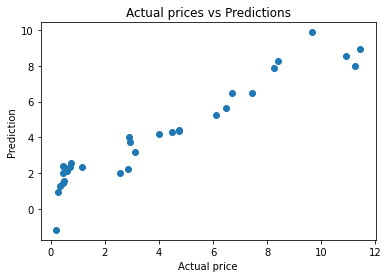

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Prediction')
plt.title('Actual prices vs Predictions')
plt.show()